# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading

In [2]:
df = pd.read_csv("input/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### 

Attribute information:
Total no. of attributes: **16** <br>
No .of instances:       **284**


01. **Gender**: M(male), F(female)
02. **Age**: Age of the patient
03. **Smoking**: YES=2 , NO=1.
04. **Yellow fingers**: YES=2 , NO=1.
05. **Anxiety**: YES=2 , NO=1.
06. **Peer_pressure**: YES=2 , NO=1.
07. **Chronic Disease**: YES=2 , NO=1.
08. **Fatigue**: YES=2 , NO=1.
09. **Allergy**: YES=2 , NO=1.
10. **Wheezing**: YES=2 , NO=1.
11. **Alcohol**: YES=2 , NO=1.
12. **Coughing**: YES=2 , NO=1.
13. **Shortness of Breath**: YES=2 , NO=1.
14. **Swallowing Difficulty**: YES=2 , NO=1.
15. **Chest pain**: YES=2 , NO=1.
16. **Lung Cancer**: YES , NO.

In [3]:
#What is the shape of the dataset?
df.shape

(309, 16)

In [4]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# 
Data Preprocessing

**Here we can observe the following:** <br>
1. **AGE** - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.
2. **SMOKING** - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.
3. **YELLOW_FINGERS** - The dataset is mostly composed of people with yellow fingers. Inferred from mean.
4. **ANXIETY** - The dataset is balanced in this regard.
5. **PEER_PRESSURE** - The dataset is balanced in this regard.
6. **CHRONIC_DISEASE** - The dataset is balanced in this regard.
7. **FATIGUE** - The dataset mostly composes of people with signs of fatigueness.
8. **ALLERGY** - The dataset mostly composes of people with allergy.
9. **WHEEZING** - The dataset mostly composes of people with wheezing symptom.
10. **ALCOHOL CONSUMING** - The dataset mostly composes of people who consumes alcohol.
11. **COUGHING** - The dataset mostly composes of people with coughing symptom.
12. **SHORTNESS OF BREATH** - The dataset mostly composes of people with shortness of breath.
13. **SWALLOWING DIFFICULTY** - The dataset mostly composes of people with **not having difficulty with swallowing.**
14. **CHEST PAIN** - The dataset mostly composes of people with chest pain.

**Will confirm these observations in the EDA section**

In [5]:
#Check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [7]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

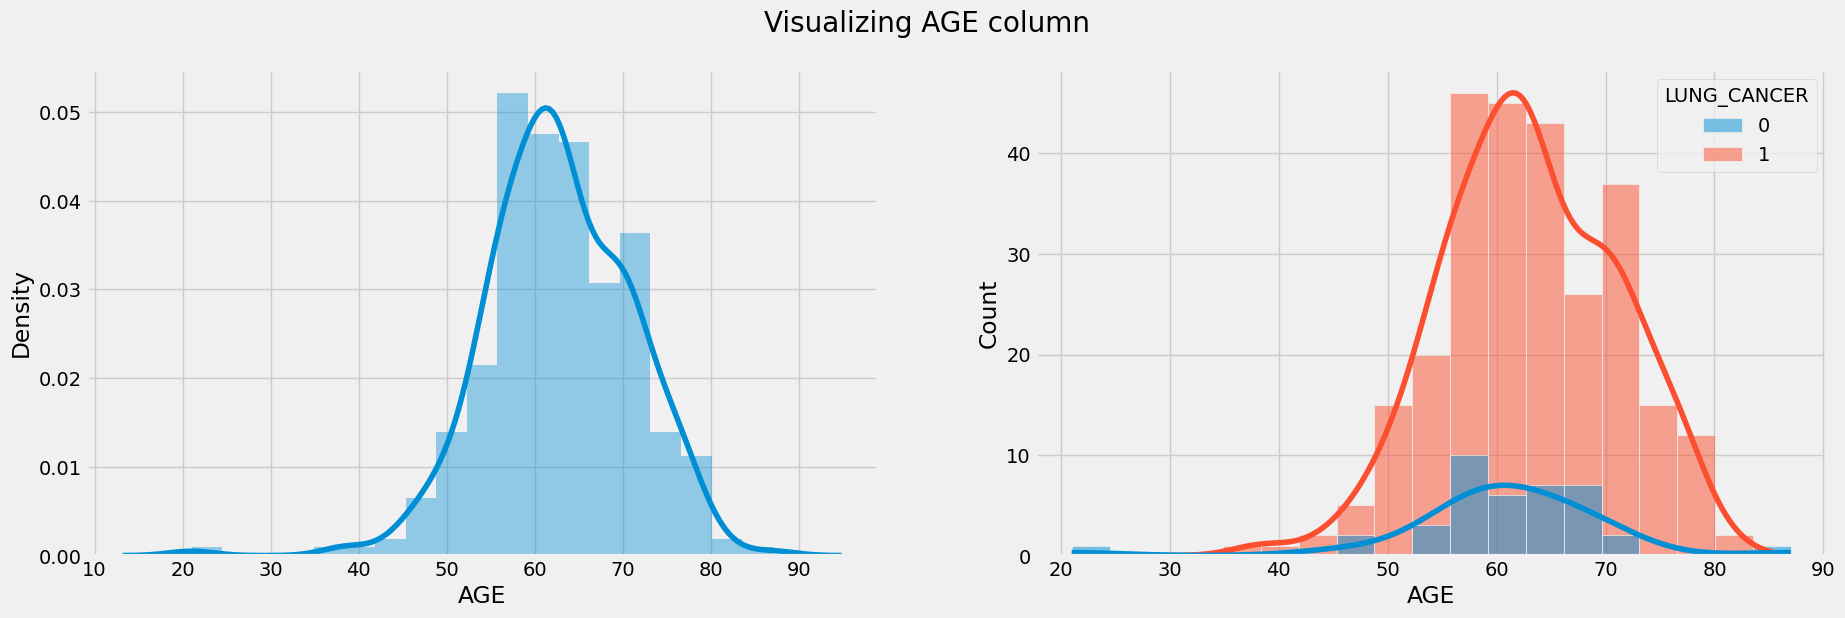

In [8]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Text(0.5, 0.98, 'Visualizing Categorical Columns')

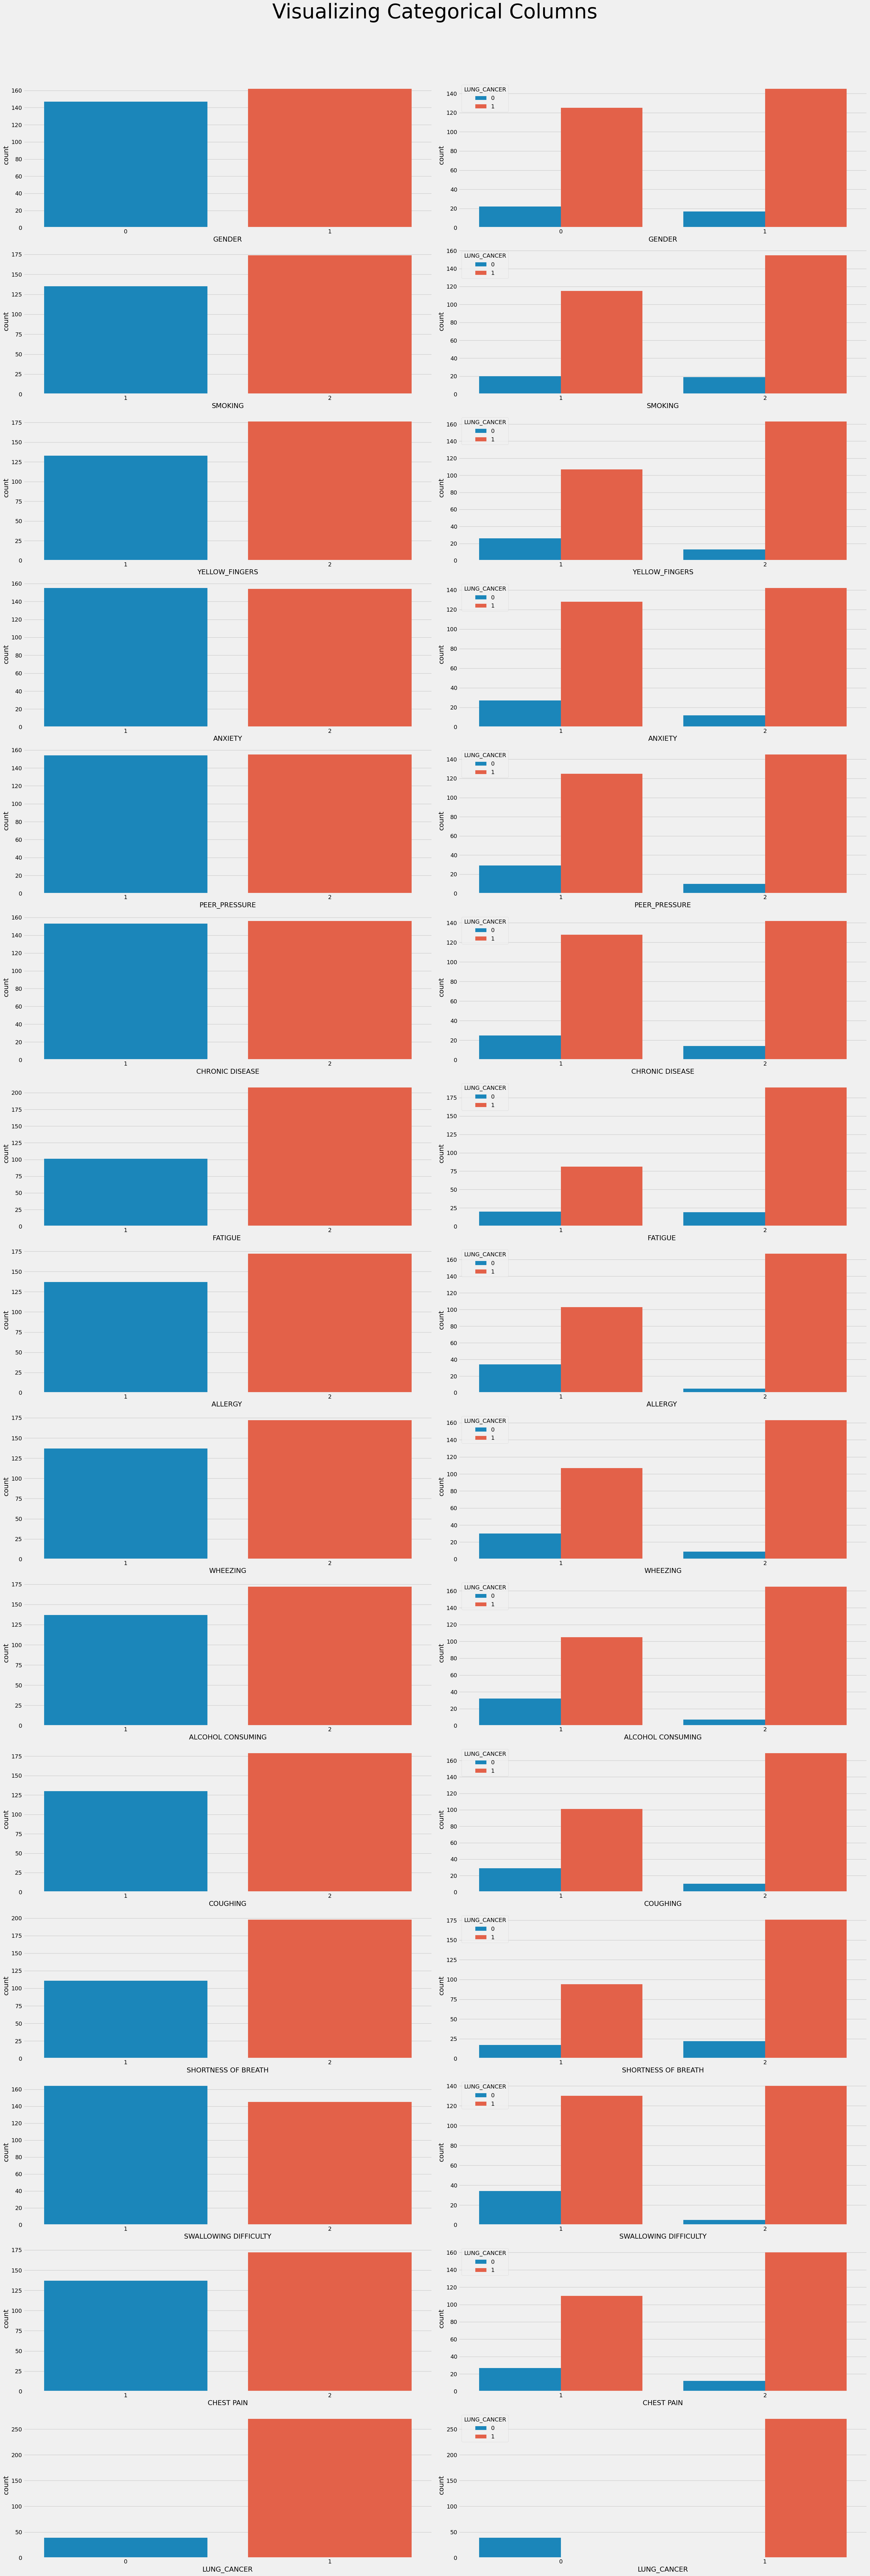

In [9]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

In [12]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [13]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [14]:
X_over,y_over=RandomOverSampler().fit_resample(X,y)

# Data Splitting

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (405, 15)
Test shape: (135, 15)


# Model training,prediction and Result Analysis

RandomForestClassifier model accuracy is 95.56% 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        68
           1       1.00      0.91      0.95        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135


Best Parameter: {'n_estimators': 150}



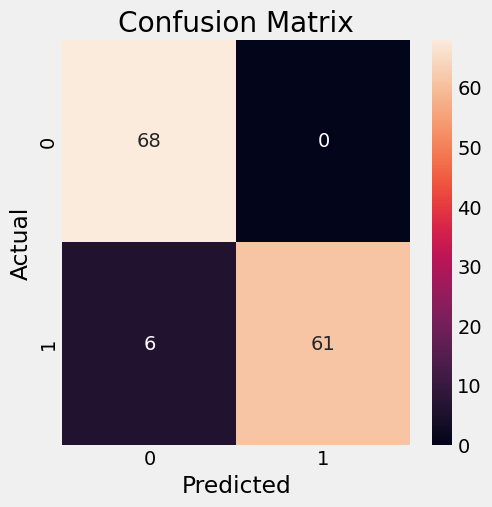

In [16]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)

RF_Accuracy = accuracy_score(y_test,rcv.predict(X_test))
print(f"RandomForestClassifier model accuracy is {RF_Accuracy*100.0:.2f}%","\n")

confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_rcv,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

# Model Saving

In [1]:
import pickle
with open(file="model/RandomForestClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=rcv, file=file)

NameError: name 'rcv' is not defined

---